In [1]:
!pip install mlxtend

# 1. Install Necessary Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [2]:
book_data = pd.read_csv('book.csv')
book_data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# 3. Data Understanding

In [4]:
book_data.shape

(2000, 11)

In [5]:
book_data.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [6]:
book_data.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

# 4. Aprori Algorithm

## a) Minimum support = 0.1

In [21]:
frequent_itemset = apriori(df = book_data,min_support=0.1,use_colnames= True)
frequent_itemset

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [12]:
frequent_itemset.sort_values('support',ascending = False).head()

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
10,0.256,"(CookBks, ChildBks)"


## 4.1 Forming Association Rule

In [8]:
assoc_rule = association_rules(frequent_itemset,metric='confidence',min_threshold=0.4)
assoc_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
65,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354
66,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
67,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
68,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


### Here we got a table showing association between the purchases of different books. For eg. If a person is reading/buying youthbks, he is most likely to read/buy childbks as well with a confidence interval of 66.66% and so on. 

In [27]:
assoc_rule.sort_values('confidence',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Ihs Items,antecedents_,consequents_
22,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,1,ItalCook,CookBks
61,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159,2,"DoItYBks,ArtBks",CookBks
65,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354,2,"DoItYBks,GeogBks",CookBks
68,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,2,"GeogBks,ArtBks",CookBks
42,"(ChildBks, RefBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534,2,"ChildBks,RefBks",CookBks
...,...,...,...,...,...,...,...,...,...,...,...,...
62,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,1,ArtBks,"CookBks,DoItYBks"
12,(ArtBks),(YouthBks),0.2410,0.2475,0.1010,0.419087,1.693281,0.041353,1.295375,1,ArtBks,YouthBks
10,(DoItYBks),(YouthBks),0.2820,0.2475,0.1155,0.409574,1.654846,0.045705,1.274505,1,DoItYBks,YouthBks
13,(YouthBks),(ArtBks),0.2475,0.2410,0.1010,0.408081,1.693281,0.041353,1.282270,1,YouthBks,ArtBks


### The above table shows the association with max confidence arranged in the ascending order.

In [34]:
assoc_rule['Ihs Items'] = assoc_rule['antecedents'].apply(lambda x : len(x))
assoc_rule['antecedents_'] = assoc_rule['antecedents'].apply(lambda a: ','.join(list(a)))
assoc_rule['consequents_'] = assoc_rule['consequents'].apply(lambda a: ','.join(list(a)))
assoc_rule[assoc_rule['Ihs Items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Ihs Items,antecedents_,consequents_
56,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2,"ChildBks,ArtBks",GeogBks
59,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2,"CookBks,DoItYBks",ArtBks
67,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2,"CookBks,ArtBks",GeogBks
66,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2,"CookBks,GeogBks",ArtBks
40,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2,"CookBks,ChildBks",RefBks


## Transform the DataFrame of rules into a matrix using the confidence metric

In [29]:
pivot = assoc_rule[assoc_rule['Ihs Items']>1].pivot(index = 'antecedents_',columns = 'consequents_', values= 'confidence').fillna(0)
pivot

consequents_,ArtBks,ChildBks,CookBks,DoItYBks,GeogBks,RefBks,YouthBks
antecedents_,,,,,,,
"ChildBks,ArtBks",0.000000,0.000000,0.778462,0.000000,0.627692,0.000000,0.000000
"ChildBks,DoItYBks",0.000000,0.000000,0.793478,0.000000,0.567935,0.000000,0.000000
"ChildBks,GeogBks",0.523077,0.000000,0.766667,0.535897,0.000000,0.000000,0.000000
"ChildBks,RefBks",0.000000,0.000000,0.808581,0.000000,0.000000,0.000000,0.000000
"ChildBks,YouthBks",0.000000,0.000000,0.781818,0.000000,0.000000,0.000000,0.000000
"CookBks,ArtBks",0.000000,0.757485,0.000000,0.607784,0.619760,0.000000,0.000000
"CookBks,ChildBks",0.494141,0.000000,0.000000,0.570312,0.583984,0.478516,0.503906
"CookBks,DoItYBks",0.541333,0.778667,0.000000,0.000000,0.578667,0.000000,0.000000
"CookBks,GeogBks",0.537662,0.776623,0.000000,0.563636,0.000000,0.000000,0.000000


## Creating the heat map showing the association

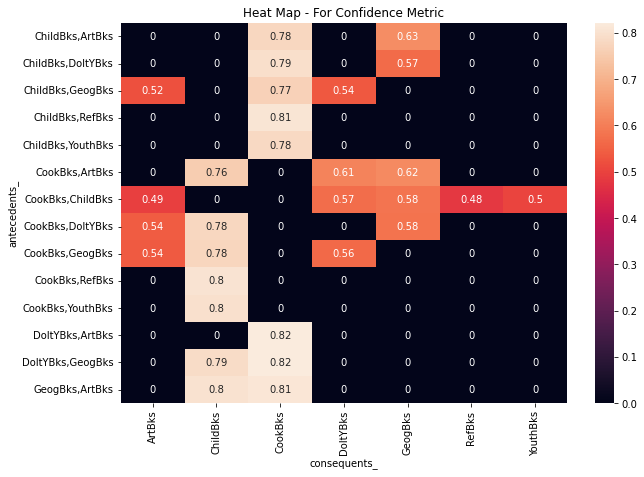

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(pivot,annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Transform the DataFrame of rules into a matrix using the Lift  metric

In [35]:
pivot_2 = assoc_rule[assoc_rule['Ihs Items']>1].pivot(index = 'antecedents_',columns = 'consequents_', values= 'lift').fillna(0)
pivot_2

consequents_,ArtBks,ChildBks,CookBks,DoItYBks,GeogBks,RefBks,YouthBks
antecedents_,,,,,,,
"ChildBks,ArtBks",0.000000,0.000000,1.806175,0.000000,2.274247,0.000000,0.000000
"ChildBks,DoItYBks",0.000000,0.000000,1.841017,0.000000,2.057735,0.000000,0.000000
"ChildBks,GeogBks",2.170444,0.000000,1.778809,1.900346,0.000000,0.000000,0.000000
"ChildBks,RefBks",0.000000,0.000000,1.876058,0.000000,0.000000,0.000000,0.000000
"ChildBks,YouthBks",0.000000,0.000000,1.813963,0.000000,0.000000,0.000000,0.000000
"CookBks,ArtBks",0.000000,1.790745,0.000000,2.155264,2.245509,0.000000,0.000000
"CookBks,ChildBks",2.050376,0.000000,0.000000,2.022385,2.115885,2.230842,2.035985
"CookBks,DoItYBks",2.246196,1.840820,0.000000,0.000000,2.096618,0.000000,0.000000
"CookBks,GeogBks",2.230964,1.835989,0.000000,1.998711,0.000000,0.000000,0.000000


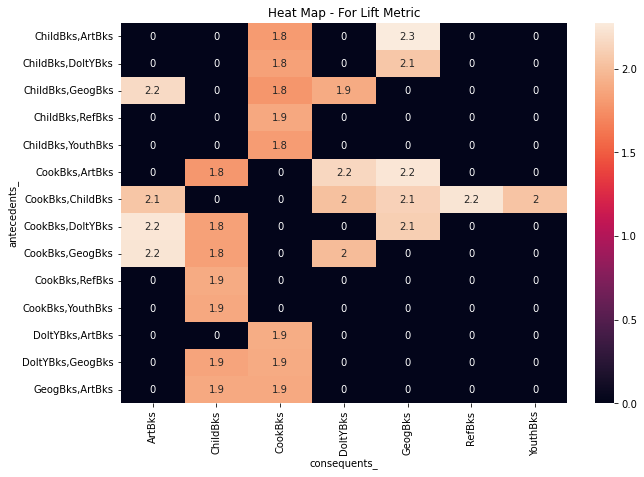

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(pivot_2,annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# 5. FP Growth Algorithm

In [50]:
frequent_itemsets_fp=fpgrowth(book_data, min_support=0.1, use_colnames=True,verbose=1)
print(frequent_itemsets_fp.shape)

9 itemset(s) from tree conditioned on items ()
2 itemset(s) from tree conditioned on items (DoItYBks)
1 itemset(s) from tree conditioned on items (DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (DoItYBks, CookBks)
3 itemset(s) from tree conditioned on items (GeogBks)
2 itemset(s) from tree conditioned on items (GeogBks, DoItYBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, CookBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (GeogBks, ChildBks)
1 itemset(s) from tree conditioned on items (GeogBks, CookBks)
4 itemset(s) from tree conditioned on items (YouthBks)
0 itemset(s) from tree conditioned on items (YouthBks, GeogBks)
0 itemset(s) from tree conditioned on items (YouthBks, DoItYBks)
0 itemset(s) from tree conditioned on items (YouthBks, ChildBks)
1 itemset(s) from tree conditioned on items (YouthBks, CookBks)
1 itemset(s) from tree conditioned on items (ChildBks)
0 itemset

In [51]:
frequent_itemsets_fp.sort_values("support", ascending = False).head()

,support,itemsets
4,0.431,(CookBks)
3,0.423,(ChildBks)
0,0.282,(DoItYBks)
1,0.276,(GeogBks)
23,0.256,"(CookBks, ChildBks)"


In [52]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.5)
print(rules_fp.shape)

(49, 9)


In [53]:
rules_fp[(rules_fp.support > 0.15) & (rules_fp.confidence > 0.4)].sort_values("confidence", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
6,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
27,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
7,(GeogBks),(CookBks),0.2760,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
34,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


In [55]:
rules_fp['lhs items'] = rules_fp['antecedents'].apply(lambda x:len(x) )
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))
rules_fp[rules_fp['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
46,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.276,0.1020,0.627692,2.274247,0.057150,1.944628,2,"ChildBks,ArtBks",GeogBks
39,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.241,0.1015,0.541333,2.246196,0.056313,1.654797,2,"CookBks,DoItYBks",ArtBks
43,"(CookBks, ArtBks)",(GeogBks),0.1670,0.276,0.1035,0.619760,2.245509,0.057408,1.904063,2,"CookBks,ArtBks",GeogBks
42,"(CookBks, GeogBks)",(ArtBks),0.1925,0.241,0.1035,0.537662,2.230964,0.057107,1.641657,2,"CookBks,GeogBks",ArtBks
45,"(ChildBks, GeogBks)",(ArtBks),0.1950,0.241,0.1020,0.523077,2.170444,0.055005,1.591452,2,"ChildBks,GeogBks",ArtBks


In [57]:
pivot = rules_fp[rules_fp['lhs items']>1].pivot(index = 'antecedents_',columns = 'consequents_', values= 'confidence').fillna(0)
pivot

consequents_,ArtBks,ChildBks,CookBks,DoItYBks,GeogBks,YouthBks
antecedents_,,,,,,
"ChildBks,ArtBks",0.000000,0.000000,0.778462,0.000000,0.627692,0.000000
"ChildBks,DoItYBks",0.000000,0.000000,0.793478,0.000000,0.567935,0.000000
"ChildBks,GeogBks",0.523077,0.000000,0.766667,0.535897,0.000000,0.000000
"ChildBks,RefBks",0.000000,0.000000,0.808581,0.000000,0.000000,0.000000
"ChildBks,YouthBks",0.000000,0.000000,0.781818,0.000000,0.000000,0.000000
"CookBks,ArtBks",0.000000,0.757485,0.000000,0.607784,0.619760,0.000000
"CookBks,ChildBks",0.000000,0.000000,0.000000,0.570312,0.583984,0.503906
"CookBks,DoItYBks",0.541333,0.778667,0.000000,0.000000,0.578667,0.000000
"CookBks,GeogBks",0.537662,0.776623,0.000000,0.563636,0.000000,0.000000


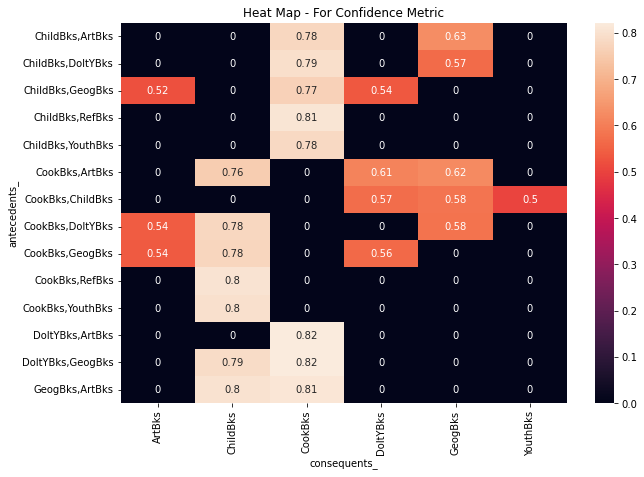

In [58]:
plt.figure(figsize=(10,7))
sns.heatmap(pivot,annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [60]:
pivot_2 = rules_fp[rules_fp['lhs items']>1].pivot(index = 'antecedents_',columns = 'consequents_', values= 'lift').fillna(0)
pivot_2

consequents_,ArtBks,ChildBks,CookBks,DoItYBks,GeogBks,YouthBks
antecedents_,,,,,,
"ChildBks,ArtBks",0.000000,0.000000,1.806175,0.000000,2.274247,0.000000
"ChildBks,DoItYBks",0.000000,0.000000,1.841017,0.000000,2.057735,0.000000
"ChildBks,GeogBks",2.170444,0.000000,1.778809,1.900346,0.000000,0.000000
"ChildBks,RefBks",0.000000,0.000000,1.876058,0.000000,0.000000,0.000000
"ChildBks,YouthBks",0.000000,0.000000,1.813963,0.000000,0.000000,0.000000
"CookBks,ArtBks",0.000000,1.790745,0.000000,2.155264,2.245509,0.000000
"CookBks,ChildBks",0.000000,0.000000,0.000000,2.022385,2.115885,2.035985
"CookBks,DoItYBks",2.246196,1.840820,0.000000,0.000000,2.096618,0.000000
"CookBks,GeogBks",2.230964,1.835989,0.000000,1.998711,0.000000,0.000000


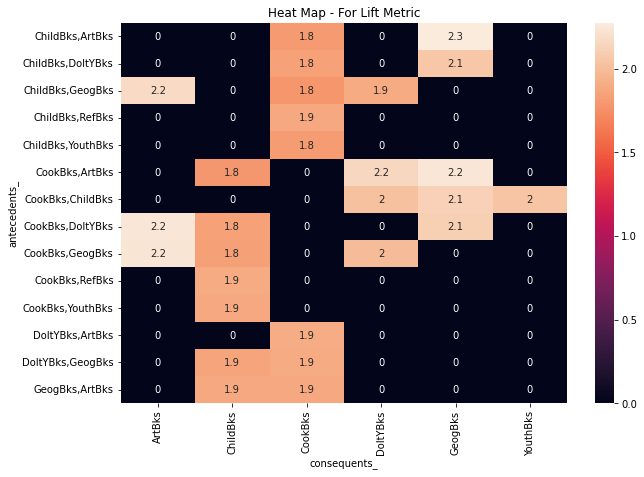

In [61]:
plt.figure(figsize=(10,7))
sns.heatmap(pivot_2,annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## From the above algorithms we can conclude that with aprori algorithm we got 70 rules whereas with FP Growth algorithm we got 49 Rules for the best associations. 

## b) Minimum support = 0.02 

In [19]:
frequent_itemset_2 = apriori(df = book_data,min_support=0.2,use_colnames= True)
frequent_itemset_2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [20]:
best_assoc_2 = association_rules(df = frequent_itemset_2,metric='confidence',min_threshold=0.4)
best_assoc_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [15]:
best_assoc_2['Ihs Items'] = best_assoc_2['antecedents'].apply(lambda x : len(x))
best_assoc_2['antecedents_'] = best_assoc_2['antecedents'].apply(lambda a: ','.join(list(a)))
best_assoc_2['consequents_'] = best_assoc_2['consequents'].apply(lambda a: ','.join(list(a)))
best_assoc_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Ihs Items,antecedents_,consequents_
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,1,CookBks,ChildBks
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,1,ChildBks,CookBks


## we can clearly see, as we changed the value of the support from 0.1 to 0.2 the number of rules decreased from 70 to only 2. Therefore we can conclude that the best association is formed with minimum support 0.1 and min_threshold = 0.4.

# ====================== THE END ========================